单分量MH算法，简单来说就是对高维随机变量遍历其每一个维度，并对每个维度单独进行采样，这样就将一个复杂的采样问题分拆成了一个个更加简单的采样问题，聪明童鞋可能已经想到了，要怎么操作才能保证细致平衡方程成立勒，这就需要用到**满条件分布**咯，它将会为我们的单个维度采样打开大门，下面先说明一下

### 一.满条件分布
MCMC的目标分布通常是多元的联合概率分布$p(x)=p(x_1,x_2,...,x_k)$，其中$x=(x_1,x_2,...,x_k)^T$为$k$维随机变量。如果条件概率分布$p(x_I\mid x_{-I})$中所有$k$个变量全部出现，其中$x_I=\{x_i,i\in I\},x_{-I}=\{x_i,i\notin I\},I\subset K=\{1,2,...,k\}$，那么称这种条件概率分布为满条件分布。   

满条件分布有一个非常有用的性质，那就是对于随机变量的任意取值$x,x'$，和任意的$I\subset K$，以下等式成立：    

$$
\frac{p(x'_I\mid x'_{-I})}{p(x_I\mid x_{-I})}=\frac{p(x')}{p(x)}
$$   

惊不惊喜，意不意外，有了上面的等式那就意味着对$\frac{p(x')}{p(x)}$的计算，只需落到对单个维度上的条件概率进行计算即可！这在方便联合概率之比的计算的同时也为单分量MH算法提供了理论支撑，下面先简单推导一下上面的等式为什么成立：    

$$
p(x_I\mid x_{-I})=\frac{p(x)}{p(x_{-I})}=\frac{p(x)}{\int_{x_I}p(x)dx_I}\propto p(x)
$$

### 二.单分量MH算法
在写具体算法之前，先对相应的符号表达做个解释：   

（1）设在第$i$次迭代结束时分量$x_j$的取值为$x_j^{(i)}$，其中$j=1,2,...,k,i=0,1,2,...$；   

（2）$x_{-j}^{(i)}$表示在第$i$轮，更新到第$j-1$维时，除去第$j$维后的所有值，即前$j-1$维已经更新为第$i$轮的值，而$j+1$维直至最后维都还是$i-1$轮的值，即：   

$$
x_{-j}^{(i)}=(x_1^{i},...x_{j-1}^i,x_{j+1}^{(i-1)},...x_k^{(i-1)})^T
$$  

好了，可以描述算法流程了

#### 单分量MH算法流程
输入：目标概率分布的密度函数$p(x)$，正整数$m,n,m<n$；   
输出：$p(x)$的随机样本$x_{m+1},x_{m+2},...,x_n$

>（1）初始化样本$x^{(0)}=(x_1^{(0)},x_2^{(0)},...,x_k^{(0)})$   

>（2）对$i=1,2,...,m,m+1,...n$：   

>>对$j=1,2,...,k$：   

>>>（2.1）根据建议分布$q(x_j^{(i-1)}\rightarrow x_j^{'(i)}\mid x_{-j}^{(i)})$抽样第$j$维的候选值$x_j^{'(i)}$   

>>>（2.2）计算第$j$维的接收率：   
$$
\alpha(x_j^{(i-1)}\rightarrow x_j^{'(i)}\mid x_{-j}^{(i)})=min\{1,\frac{p(x_j^{'(i)}\mid x_{-j}^{(i)})q(x_j^{'(i)}\rightarrow x_j^{(i-1)}\mid x_{-j}^{(i)})}{p(x_j^{(i-1)}\mid x_{-j}^{(i)})q(x_j^{(i-1)}\rightarrow x_j^{'(i)}\mid x_{-j}^{(i)})}\}
$$   

>>>（2.3）从$(0,1)$均匀分布中随机采样$u$，如果$u<\alpha(x_j^{(i-1)}\rightarrow x_j^{'(i)}\mid x_{-j}^{(i)})$，则令$x_j^{(i)}=x_j^{'(i)}$，否则$x_j^{(i)}=x_j^{(i-1)}$   

>（3）返回样本集$\{x_{m+1},x_{m+2},...,x_n\}$  

完事儿了，要证明单分量MH算法满足细致平衡方程也很简单，下面简单说明一下：    

（1）首先条件概率之比$\frac{p(x_j^{'(i)}\mid x_{-j}^{(i)})}{p(x_j^{(i-1)}\mid x_{-j}^{(i)})}$根据满条件分布中的等式可以替换为联合概率之比；   

（2）其次，任意建议分布$q(x_j^{(i-1)}\rightarrow x_j^{'(i)}\mid x_{-j}^{(i)})$均不会影响到细致平衡方程（见前一个note的证明）；  

综合这两条我们可以推导出（下面的$\sim$表示分布相同）：    

$$
p(x_1^{(i-1)},x_2^{(i-1)},...,x_k^{(i-1)})\\
\sim p(x_1^{(i)},x_2^{(i-1)},...,x_k^{(i-1)})\\
\cdots\\
\sim p(x_1^{(i)},x_2^{(i)},...x_j^{(i)},x_{j+1}^{(i-1)},...,x_k^{(i-1)})\\
\cdots\\
\sim p(x_1^{(i)},x_2^{(i)},...,x_k^{(i)})\\
$$   

所以：$p(x_1^{(i-1)},x_2^{(i-1)},...,x_k^{(i-1)})\sim p(x_1^{(i)},x_2^{(i)},...,x_k^{(i)}),i=1,2,...$

### 三.案例
由于单分量MH是用于高维空间的采样，所以这里我造一个二元高斯分布$N(u,\Sigma)$，其对应的均值、协方差如下：   

$$
u=[0,0]^T\\
\Sigma=\begin{bmatrix}
1 &\rho \\ 
\rho & 1
\end{bmatrix}
$$   

那么，它对应的条件概率分布为一元高斯分布，如下：   

$$
p(x_1\mid x_2)=N(\rho x_2,(1-\rho^2))\\
p(x_2\mid x_1)=N(\rho x_1,(1-\rho^2))
$$  

我们不妨取$\rho=0.5$

In [1]:
import os
os.chdir('../')
from ml_models import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#定义均值，协方差
u=np.asarray([0,0])
sigma=np.asarray([[1,0.5],
                  [0.5,1]])

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


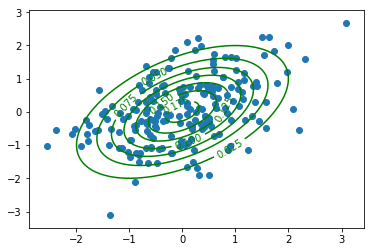

In [3]:
#看看目标分布的效果
X=np.random.multivariate_normal(mean=u, cov=sigma, size=200)
utils.plot_contourf(X,lambda x:utils.gaussian_nd(x,u,sigma),8)

建议分布使用以当前维度的取值为均值，方差1为一元高斯分布，这样它们在该维的建议分布取值对称：   

$$
q(x_j^{'(i)}\rightarrow x_j^{(i-1)}\mid x_{-j}^{(i)})=q(x_j^{(i-1)}\rightarrow x_j^{'(i)} \mid x_{-j}^{(i)})
$$  

对于计算接受概率就更方便了：   

$$
\alpha(x_j^{(i-1)}\rightarrow x_j^{'(i)}\mid x_{-j}^{(i)})=min\{1,\frac{p(x_j^{'(i)}\mid x_{-j}^{(i)})}{p(x_j^{(i-1)}\mid x_{-j}^{(i)})}\}
$$

In [4]:
import copy
#采样的样本量
nums=1000
count=0
points=[]
#采样x0
point=[np.random.randn(),np.random.randn()]
points.append(point)
while count<nums:
    for k in (0,1):
        new_point=copy.deepcopy(point)
        #按照q(x,x')
        new_point[k]=np.random.randn()+point[k]
        #alpha(x,x')
        alpha=min(1.,utils.gaussian_1d(new_point[k],0.5*new_point[(k+1)%2],0.75)/utils.gaussian_1d(point[k],0.5*point[(k+1)%2],0.75))
        #从(0,1)均匀采样一个u
        u=np.random.random()
        #判断是否接收新点还是旧点
        if u<alpha:
            point=new_point
    points.append(point)
    count+=1

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


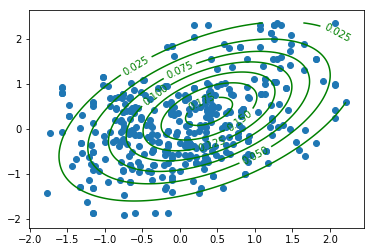

In [5]:
utils.plot_contourf(np.asarray(points[-400:]),lambda x:utils.gaussian_nd(x,u,sigma),8)

### 四.小结

效果看起来还不错，然后我们继续想一种情况，如果目标分布$p(x)$的采样困难是由于随机变量维度太高造成的，而它在单个维度（满条件概率分布）上采样是相对比较容易的，那么我们可以用单维度上的满条件概率分布替换建议分布来采样，即：   

$$
q(x_j^{(i-1)}\rightarrow x_j^{'(i)} \mid x_{-j}^{(i)})=p(x_j^{'(i)} \mid x_{-j}^{(i)})
$$   

这种情况下又会发生什么神奇的事情呢？请看下一节Gibbs采样